In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
sns.set_palette('Reds') 

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings("ignore")


         cwd: C:\Users\L\AppData\Local\Temp\pip-install-8wik5v1i\fiona_fbee78378f864b0bb0111101ae501489\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\L\AppData\Local\Programs\Python\Python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\L\\AppData\\Local\\Temp\\pip-install-8wik5v1i\\fiona_3b7dee46b2eb4fc99d76bb402a7e9e43\\setup.py'"'"'; __file__='"'"'C:\\Users\\L\\AppData\\Local\\Temp\\pip-install-8wik5v1i\\fiona_3b7dee46b2eb4fc99d76bb402a7e9e43\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code

In [163]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
df = pd.read_csv("housing_merged_crime_2.csv")
df

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,383,2560,4986,11383,28679,8416,244,1462131,6,67
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,383,2560,4986,11383,28679,8416,244,1462131,6,67
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,383,2560,4986,11383,28679,8416,244,1462131,6,67
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,383,2560,4986,11383,28679,8416,244,1462131,6,67
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,383,2560,4986,11383,28679,8416,244,1462131,6,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264810,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,97,165,1029,1754,3623,903,35,178980,6,89
264811,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,97,165,1029,1754,3623,903,35,178980,6,89
264812,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,97,165,1029,1754,3623,903,35,178980,6,89
264813,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,97,165,1029,1754,3623,903,35,178980,6,89


In [165]:
df['state'] = df['county_state'].str[-2:]
df['state']

0         CA
1         CA
2         CA
3         CA
4         CA
          ..
264810    CA
264811    CA
264812    CA
264813    CA
264814    CA
Name: state, Length: 264815, dtype: object

In [166]:
df['county'] = df['county_state'].str[:-11]

In [167]:
df['county']

0         Sacramento
1         Sacramento
2         Sacramento
3         Sacramento
4         Sacramento
             ...    
264810        Shasta
264811        Shasta
264812        Shasta
264813        Shasta
264814        Shasta
Name: county, Length: 264815, dtype: object

In [168]:
#housing['region_from_url'] = housing['region_url'].str.replace("https://","").str.replace(".craigslist.org", "")

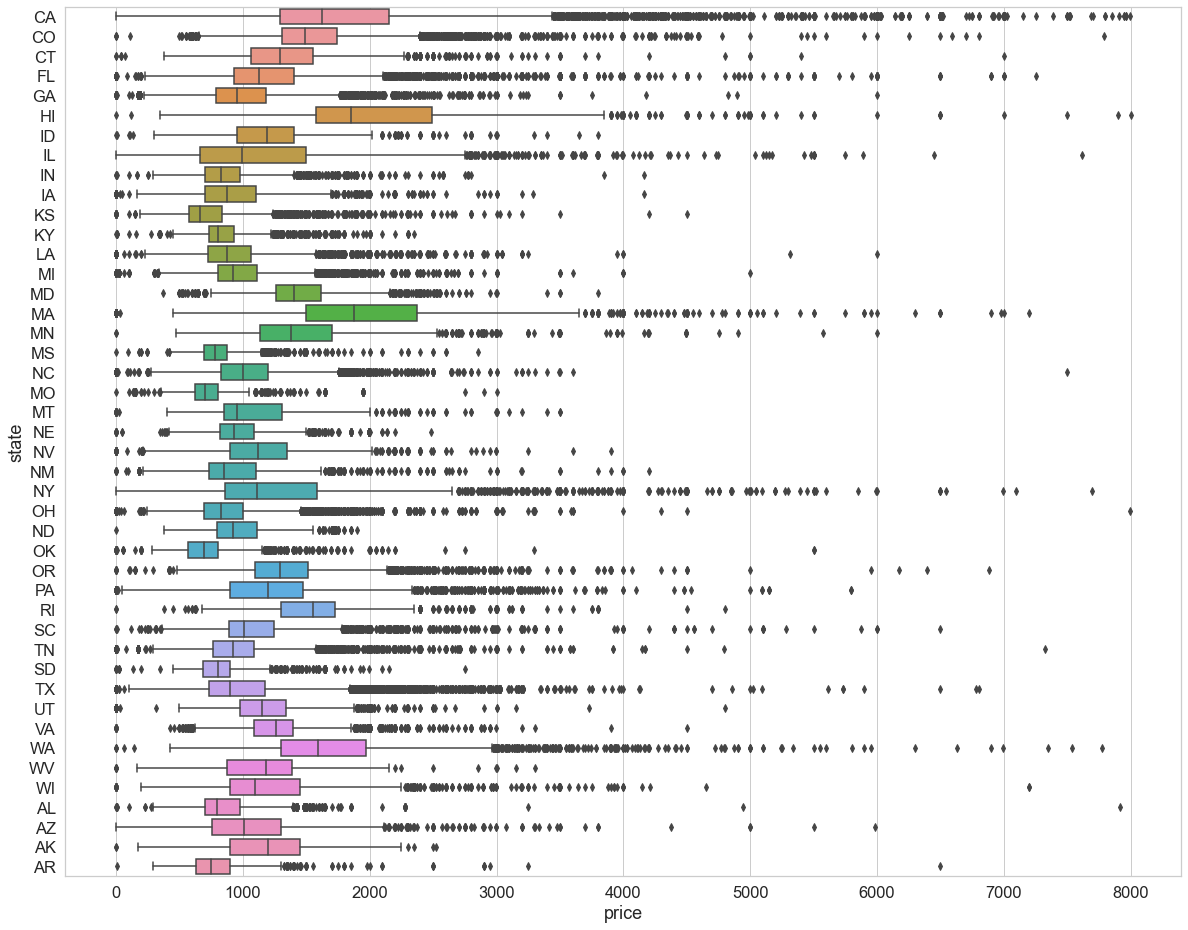

In [169]:
g = sns.boxplot(y = "state",
              x = 'price', 
              data = df)
g.figure.set_size_inches(20,16)
plt.show()

fig = g.get_figure()
fig.savefig("price_by_state.png")

In [170]:
df2 = pd.read_csv("Public_Schools.csv")
df2

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,...,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,...,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,...,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,...,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102365,-83.085229,42.320632,102216,260032201947,COVENANT HOUSE ACADEMY DETROIT - SOUTHWEST SITE,1450 25TH ST,DETROIT,MI,48216,1404,...,IMAGERY,2016-01-13T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,202,09,12,2600322,7,NOT AVAILABLE
102366,-83.272599,42.062038,102217,260198003940,FRED W. RITTER ELEMENTARY SCHOOL,5650 CARLETON ROCKWOOD RD,SOUTH ROCKWOOD,MI,48179,9764,...,IMAGERY,2010-06-04T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,291,KG,04,2601980,17,NOT AVAILABLE
102367,-88.914089,30.436478,102218,280177000284,DIBERVILLE ELEM,4540 BRODIE ROAD,DIBERVILLE,MS,39540,NOT AVAILABLE,...,IMAGERY,2013-05-28T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,761,KG,03,2801770,40,NOT AVAILABLE
102368,-94.558365,39.187941,102219,292280001267,DAVIDSON ELEM.,5100 N HIGHLAND,KANSAS CITY,MO,64118,6049,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,404,PK,05,2922800,22,NOT AVAILABLE


In [171]:
df

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,state,county
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264810,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264811,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264812,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264813,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta


In [172]:
df2.groupby('COUNTY').size()

COUNTY
ABBEVILLE          9
ACADIA            27
ACCOMACK          13
ADA              131
ADAIR             37
                ... 
YUKON-KOYUKUK     31
YUMA              83
ZAPATA             6
ZAVALA             7
ZIEBACH            4
Length: 1908, dtype: int64

In [173]:
df2.groupby('CITY').size()

CITY
ABBEVILLE        17
ABBOTSFORD        2
ABBOTT            1
ABERCROMBIE       1
ABERDEEN         48
                 ..
ZOLFO SPRINGS     2
ZUMBROTA          4
ZUNI              5
ZURICH            1
ZWOLLE            2
Length: 12805, dtype: int64

In [174]:
number_of_school = df2.groupby('COUNTY').size().reset_index()

In [175]:
number_of_school['county'] = number_of_school['COUNTY'].str.title()

In [176]:
number_of_school

,COUNTY,0,county
0,ABBEVILLE,9,Abbeville
1,ACADIA,27,Acadia
2,ACCOMACK,13,Accomack
3,ADA,131,Ada
4,ADAIR,37,Adair
...,...,...,...
1903,YUKON-KOYUKUK,31,Yukon-Koyukuk
1904,YUMA,83,Yuma
1905,ZAPATA,6,Zapata
1906,ZAVALA,7,Zavala


In [177]:

number_of_school.columns = ['COUNTY', 'Number_Of_Public_School', 'county']
number_of_school

,COUNTY,Number_Of_Public_School,county
0,ABBEVILLE,9,Abbeville
1,ACADIA,27,Acadia
2,ACCOMACK,13,Accomack
3,ADA,131,Ada
4,ADAIR,37,Adair
...,...,...,...
1903,YUKON-KOYUKUK,31,Yukon-Koyukuk
1904,YUMA,83,Yuma
1905,ZAPATA,6,Zapata
1906,ZAVALA,7,Zavala


In [178]:
df

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,state,county
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,4986,11383,28679,8416,244,1462131,6,67,CA,Sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264810,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264811,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264812,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta
264813,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,1029,1754,3623,903,35,178980,6,89,CA,Shasta


In [179]:
school1 = df.merge(number_of_school, how='inner', left_on = 'county', right_on = 'county')
school1

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,state,county,COUNTY,Number_Of_Public_School
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,28679,8416,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,28679,8416,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,28679,8416,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,28679,8416,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,28679,8416,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263729,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,3623,903,35,178980,6,89,CA,Shasta,SHASTA,102
263730,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,3623,903,35,178980,6,89,CA,Shasta,SHASTA,102
263731,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,3623,903,35,178980,6,89,CA,Shasta,SHASTA,102
263732,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,3623,903,35,178980,6,89,CA,Shasta,SHASTA,102


In [180]:
school1.to_csv('Housing_with_school.csv')

In [181]:
df2

,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,...,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,...,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,...,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,...,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102365,-83.085229,42.320632,102216,260032201947,COVENANT HOUSE ACADEMY DETROIT - SOUTHWEST SITE,1450 25TH ST,DETROIT,MI,48216,1404,...,IMAGERY,2016-01-13T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,3,202,09,12,2600322,7,NOT AVAILABLE
102366,-83.272599,42.062038,102217,260198003940,FRED W. RITTER ELEMENTARY SCHOOL,5650 CARLETON ROCKWOOD RD,SOUTH ROCKWOOD,MI,48179,9764,...,IMAGERY,2010-06-04T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,291,KG,04,2601980,17,NOT AVAILABLE
102367,-88.914089,30.436478,102218,280177000284,DIBERVILLE ELEM,4540 BRODIE ROAD,DIBERVILLE,MS,39540,NOT AVAILABLE,...,IMAGERY,2013-05-28T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,761,KG,03,2801770,40,NOT AVAILABLE
102368,-94.558365,39.187941,102219,292280001267,DAVIDSON ELEM.,5100 N HIGHLAND,KANSAS CITY,MO,64118,6049,...,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,404,PK,05,2922800,22,NOT AVAILABLE


In [182]:
df3 = pd.read_csv('income.csv')

In [183]:
df3 = df3[['State_Name','State_ab','County','City','Median']]
df3

,State_Name,State_ab,County,City,Median
0,Alabama,AL,Mobile County,Chickasaw,30506
1,Alabama,AL,Barbour County,Louisville,19528
2,Alabama,AL,Shelby County,Columbiana,31930
3,Alabama,AL,Mobile County,Satsuma,52814
4,Alabama,AL,Mobile County,Dauphin Island,67225
...,...,...,...,...,...
32521,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,13729
32522,Puerto Rico,PR,Adjuntas Municipio,Aguada,9923
32523,Puerto Rico,PR,Adjuntas Municipio,Aguada,34054
32524,Puerto Rico,PR,Adjuntas Municipio,Aguada,0


In [184]:
income_median = df3.groupby('County').mean().reset_index()
income_median

,County,Median
0,Abbeville County,69420.066986
1,Acadia Parish,60547.148387
2,Accomack County,104656.813699
3,Ada County,81019.023622
4,Adair County,68828.325098
...,...,...
1128,Young County,36772.000000
1129,Yuba County,46888.000000
1130,Yukon-Koyukuk Census Area,30981.250000
1131,Yuma County,86485.800000


In [185]:
income_median['county'] = income_median['County'].str[:-7]
income_median

,County,Median,county
0,Abbeville County,69420.066986,Abbeville
1,Acadia Parish,60547.148387,Acadia
2,Accomack County,104656.813699,Accomack
3,Ada County,81019.023622,Ada
4,Adair County,68828.325098,Adair
...,...,...,...
1128,Young County,36772.000000,Young
1129,Yuba County,46888.000000,Yuba
1130,Yukon-Koyukuk Census Area,30981.250000,Yukon-Koyukuk Cens
1131,Yuma County,86485.800000,Yuma


In [186]:
income1 = school1.merge(income_median, how='left', left_on = 'county', right_on = 'county')
income1

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,ARSON,population,FIPS_ST,FIPS_CTY,state,county,COUNTY,Number_Of_Public_School,County,Median
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267681,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267682,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267683,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4


In [187]:
income1.to_csv('Housing_with_school_income_crime.csv')

In [188]:
income1

,Unnamed: 0,id,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,ARSON,population,FIPS_ST,FIPS_CTY,state,county,COUNTY,Number_Of_Public_School,County,Median
0,0,7049404148,1400,house,1010,2,1.0,1,1,1,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
1,1,7046093394,1795,apartment,869,1,1.0,1,1,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
2,2,7047484892,2595,townhouse,1317,2,2.5,1,1,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
3,3,7049005381,1695,house,1100,3,2.0,0,0,0,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
4,4,7049394070,1699,apartment,860,2,1.0,1,1,1,...,244,1462131,6,67,CA,Sacramento,SACRAMENTO,380,Sacramento County,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,265050,7026220138,1800,house,2225,3,2.0,0,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267681,265052,7025150381,800,apartment,700,1,1.0,1,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267682,265053,7024580936,1450,townhouse,1600,2,2.5,0,0,1,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4
267683,265054,7010591533,1350,apartment,1000,3,1.0,0,0,0,...,35,178980,6,89,CA,Shasta,SHASTA,102,Shasta County,39060.4


In [189]:
income1.columns

Index(['Unnamed: 0', 'id', 'price', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'description', 'lat', 'long', 'region_state',
       'Metro', 'SizeRank', 'median_rent_2019_12', 'county_state',
       'crime_rate_per_100000', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF',
       'COVIND', 'INDEX', 'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT',
       'BURGLRY', 'LARCENY', 'MVTHEFT', 'ARSON', 'population', 'FIPS_ST',
       'FIPS_CTY', 'state', 'county', 'COUNTY', 'Number_Of_Public_School',
       'County', 'Median'],
      dtype='object')

In [190]:
finaldata=income1[['price','type','sqfeet','beds','baths','cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options','region_state','median_rent_2019_12','crime_rate_per_100000','population','state','county','Number_Of_Public_School','Median']]

In [191]:
finaldata

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options,parking_options,region_state,median_rent_2019_12,crime_rate_per_100000,population,state,county,Number_Of_Public_School,Median
0,1400,house,1010,2,1.0,1,1,1,1,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
1,1795,apartment,869,1,1.0,1,1,0,0,0,...,w/d in unit,NaN,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
2,2595,townhouse,1317,2,2.5,1,1,0,0,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
3,1695,house,1100,3,2.0,0,0,0,0,0,...,w/d hookups,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
4,1699,apartment,860,2,1.0,1,1,1,0,0,...,laundry on site,carport,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,1800,house,2225,3,2.0,0,0,0,0,0,...,w/d hookups,off-street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267681,800,apartment,700,1,1.0,1,0,0,0,0,...,laundry on site,carport,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267682,1450,townhouse,1600,2,2.5,0,0,1,0,0,...,w/d in unit,attached garage,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267683,1350,apartment,1000,3,1.0,0,0,0,0,0,...,laundry on site,street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4


In [192]:
finaldata.rename(columns={'Median':'median_income'}, inplace=True)

In [193]:
finaldata

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options,parking_options,region_state,median_rent_2019_12,crime_rate_per_100000,population,state,county,Number_Of_Public_School,median_income
0,1400,house,1010,2,1.0,1,1,1,1,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
1,1795,apartment,869,1,1.0,1,1,0,0,0,...,w/d in unit,NaN,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
2,2595,townhouse,1317,2,2.5,1,1,0,0,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
3,1695,house,1100,3,2.0,0,0,0,0,0,...,w/d hookups,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
4,1699,apartment,860,2,1.0,1,1,1,0,0,...,laundry on site,carport,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,1800,house,2225,3,2.0,0,0,0,0,0,...,w/d hookups,off-street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267681,800,apartment,700,1,1.0,1,0,0,0,0,...,laundry on site,carport,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267682,1450,townhouse,1600,2,2.5,0,0,1,0,0,...,w/d in unit,attached garage,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267683,1350,apartment,1000,3,1.0,0,0,0,0,0,...,laundry on site,street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4


In [194]:
finaldata.to_csv('Housing_rent_.csv')

In [195]:
finaldata

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options,parking_options,region_state,median_rent_2019_12,crime_rate_per_100000,population,state,county,Number_Of_Public_School,median_income
0,1400,house,1010,2,1.0,1,1,1,1,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
1,1795,apartment,869,1,1.0,1,1,0,0,0,...,w/d in unit,NaN,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
2,2595,townhouse,1317,2,2.5,1,1,0,0,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
3,1695,house,1100,3,2.0,0,0,0,0,0,...,w/d hookups,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
4,1699,apartment,860,2,1.0,1,1,1,0,0,...,laundry on site,carport,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,1800,house,2225,3,2.0,0,0,0,0,0,...,w/d hookups,off-street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267681,800,apartment,700,1,1.0,1,0,0,0,0,...,laundry on site,carport,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267682,1450,townhouse,1600,2,2.5,0,0,1,0,0,...,w/d in unit,attached garage,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267683,1350,apartment,1000,3,1.0,0,0,0,0,0,...,laundry on site,street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4


In [364]:
df = finaldata.copy()

In [365]:
df

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options,parking_options,region_state,median_rent_2019_12,crime_rate_per_100000,population,state,county,Number_Of_Public_School,median_income
0,1400,house,1010,2,1.0,1,1,1,1,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
1,1795,apartment,869,1,1.0,1,1,0,0,0,...,w/d in unit,NaN,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
2,2595,townhouse,1317,2,2.5,1,1,0,0,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
3,1695,house,1100,3,2.0,0,0,0,0,0,...,w/d hookups,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
4,1699,apartment,860,2,1.0,1,1,1,0,0,...,laundry on site,carport,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,1800,house,2225,3,2.0,0,0,0,0,0,...,w/d hookups,off-street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267681,800,apartment,700,1,1.0,1,0,0,0,0,...,laundry on site,carport,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267682,1450,townhouse,1600,2,2.5,0,0,1,0,0,...,w/d in unit,attached garage,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267683,1350,apartment,1000,3,1.0,0,0,0,0,0,...,laundry on site,street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4


In [366]:
df["median_income"] = df["median_income"].fillna(df.groupby("state")["median_income"].transform("mean"))

In [367]:
df

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,...,laundry_options,parking_options,region_state,median_rent_2019_12,crime_rate_per_100000,population,state,county,Number_Of_Public_School,median_income
0,1400,house,1010,2,1.0,1,1,1,1,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
1,1795,apartment,869,1,1.0,1,1,0,0,0,...,w/d in unit,NaN,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
2,2595,townhouse,1317,2,2.5,1,1,0,0,0,...,w/d in unit,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
3,1695,house,1100,3,2.0,0,0,0,0,0,...,w/d hookups,attached garage,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
4,1699,apartment,860,2,1.0,1,1,1,0,0,...,laundry on site,carport,sacramento_ca,1795.0,547.693743,1462131,CA,Sacramento,380,83238.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267680,1800,house,2225,3,2.0,0,0,0,0,0,...,w/d hookups,off-street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267681,800,apartment,700,1,1.0,1,0,0,0,0,...,laundry on site,carport,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267682,1450,townhouse,1600,2,2.5,0,0,1,0,0,...,w/d in unit,attached garage,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4
267683,1350,apartment,1000,3,1.0,0,0,0,0,0,...,laundry on site,street parking,redding_ca,1550.0,725.220695,178980,CA,Shasta,102,39060.4


In [368]:
df.columns

Index(['price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'region_state', 'median_rent_2019_12',
       'crime_rate_per_100000', 'population', 'state', 'county',
       'Number_Of_Public_School', 'median_income'],
      dtype='object')

In [369]:
df = df[df['median_income'].notna()]

In [370]:
X = pd.get_dummies(df.drop(['price','state','county','region_state'], axis=1))

In [371]:
X_lr = pd.get_dummies(df.drop(['price','state','county','region_state'], axis=1), drop_first=True)

In [372]:
y = df['price']

In [373]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.3, random_state=88)

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [375]:
X_train.shape, X_test.shape

((186924, 38), (80111, 38))

In [376]:
X.isnull().sum()

sqfeet                                0
beds                                  0
baths                                 0
cats_allowed                          0
dogs_allowed                          0
smoking_allowed                       0
wheelchair_access                     0
electric_vehicle_charge               0
comes_furnished                       0
median_rent_2019_12                   0
crime_rate_per_100000                 0
population                            0
Number_Of_Public_School               0
median_income                         0
type_apartment                        0
type_assisted living                  0
type_condo                            0
type_cottage/cabin                    0
type_duplex                           0
type_flat                             0
type_house                            0
type_in-law                           0
type_land                             0
type_loft                             0
type_manufactured                     0


In [207]:
df_log = df.copy()

In [208]:
df_log['crime_rate_per_100000'] = np.log(df['crime_rate_per_100000'])
df_log['crime_rate_per_100000'] = np.log(df['crime_rate_per_100000'])

In [209]:
X.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'median_rent_2019_12', 'crime_rate_per_100000',
       'population', 'Number_Of_Public_School', 'median_income',
       'type_apartment', 'type_assisted living', 'type_condo',
       'type_cottage/cabin', 'type_duplex', 'type_flat', 'type_house',
       'type_in-law', 'type_land', 'type_loft', 'type_manufactured',
       'type_townhouse', 'laundry_options_laundry in bldg',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_attached garage', 'parking_options_carport',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking'],
      dtype='object')

1)

In [210]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [290]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [212]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [213]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(OSR2(lr, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, lr.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, lr.predict(X_test)))]}
comparison_data

{'Linear Regression': ['0.523', '397.8172', '250.768']}

In [214]:
comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Linear Regression
OSR2,0.523
Out-of-sample RMSE,397.8172
Out-of-sample MAE,250.768


2)

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'median_rent_2019_12', 'crime_rate_per_100000',
       'population', 'Number_Of_Public_School', 'median_income',
       'type_apartment', 'type_assisted living', 'type_condo',
       'type_cottage/cabin', 'type_duplex', 'type_flat', 'type_house',
       'type_in-law', 'type_land', 'type_loft', 'type_manufactured',
       'type_townhouse', 'laundry_options_laundry in bldg',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_attached garage', 'parking_options_carport',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking']
VIF(X_train, cols)

sqfeet                                1.006193e+00
beds                                  1.293562e+00
baths                                 1.474819e+00
cats_allowed                          5.275387e+00
dogs_allowed                          5.110245e+00
smoking_allowed                       1.206495e+00
wheelchair_access                     1.171399e+00
electric_vehicle_charge               1.070778e+00
comes_furnished                       1.093723e+00
median_rent_2019_12                   1.648133e+00
crime_rate_per_100000                 1.131938e+00
population                            3.388114e+00
Number_Of_Public_School               2.792757e+00
median_income                         1.131634e+00
type_apartment                                 inf
type_assisted living                  1.801440e+15
type_condo                                     inf
type_cottage/cabin                             inf
type_duplex                                    inf
type_flat                      

In [377]:
cols = ['sqfeet', 'beds', 'baths', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'median_rent_2019_12', 'crime_rate_per_100000',
       'population', 'Number_Of_Public_School', 'median_income',
       'type_apartment', 'type_assisted living', 'type_condo',
       'type_cottage/cabin', 'type_duplex', 'type_flat', 'type_house',
       'type_in-law', 'type_land', 'type_loft', 'type_manufactured',
       'type_townhouse', 'laundry_options_laundry in bldg',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_attached garage', 'parking_options_carport',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking']
VIF(X_train, cols)

sqfeet                                1.006189
beds                                  1.293501
baths                                 1.473503
dogs_allowed                          1.239945
smoking_allowed                       1.206051
wheelchair_access                     1.170946
electric_vehicle_charge               1.070564
comes_furnished                       1.090830
median_rent_2019_12                   1.648085
crime_rate_per_100000                 1.131927
population                            3.387434
Number_Of_Public_School               2.792751
median_income                         1.131356
type_apartment                             inf
type_assisted living                       inf
type_condo                                 inf
type_cottage/cabin                         inf
type_duplex                                inf
type_flat                                  inf
type_house                                 inf
type_in-law                                inf
type_land    

In [378]:
cols2 = ['sqfeet', 'beds', 'baths', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'median_rent_2019_12', 'crime_rate_per_100000',
       'population', 'Number_Of_Public_School', 'median_income',
        'type_assisted living', 'type_condo',
       'type_cottage/cabin', 'type_duplex', 'type_flat', 'type_house',
       'type_in-law', 'type_land', 'type_loft', 'type_manufactured',
       'type_townhouse',
       'laundry_options_laundry on site', 'laundry_options_no laundry on site',
       'laundry_options_w/d hookups', 'laundry_options_w/d in unit',
       'parking_options_carport',
       'parking_options_detached garage', 'parking_options_no parking',
       'parking_options_off-street parking', 'parking_options_street parking',
       'parking_options_valet parking']
VIF(X_train, cols2)

sqfeet                                1.006066
beds                                  1.291800
baths                                 1.453894
dogs_allowed                          1.206069
smoking_allowed                       1.173535
wheelchair_access                     1.165095
electric_vehicle_charge               1.066233
comes_furnished                       1.089507
median_rent_2019_12                   1.642655
crime_rate_per_100000                 1.131319
population                            3.369284
Number_Of_Public_School               2.785421
median_income                         1.130833
type_assisted living                  1.000087
type_condo                            1.040490
type_cottage/cabin                    1.009216
type_duplex                           1.029965
type_flat                             1.010210
type_house                            1.126434
type_in-law                           1.004197
type_land                             1.000810
type_loft    

In [379]:
X_train_lr = X_train_lr.drop(['cats_allowed'], axis=1)
X_test_lr = X_test_lr.drop(['cats_allowed'], axis=1)

In [380]:
X_train = X_train.drop(['cats_allowed','population'], axis=1)
X_test = X_test.drop(['cats_allowed','population'], axis=1)

In [381]:
import statsmodels.formula.api as smf
train = X_train_lr.copy()
train['price'] = y_train.copy()

In [382]:
lr3 = smf.ols(formula="price ~ " + " + ".join(["Q('" + i +"')" for i in cols2]),
                 data= train).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     5988.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:32:12   Log-Likelihood:            -1.3840e+06
No. Observations:              186924   AIC:                         2.768e+06
Df Residuals:                  186889   BIC:                         2.768e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [218]:
lr2 = LinearRegression().fit(X_train, y_train)

In [219]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(OSR2(lr2, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, lr2.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, lr2.predict(X_test)))]}
comparison_data

{'Linear Regression': ['0.523', '397.8712', '250.999']}

3) Decision Tree Regressor

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, 
### we get the same split.
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

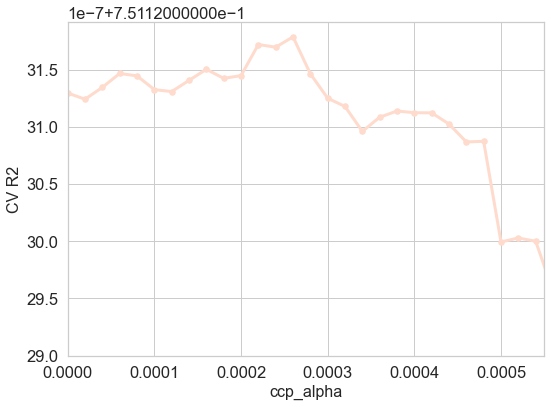

In [223]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])

plt.tight_layout()
plt.show()

In [420]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.00026000000000000003}


In [224]:
print('Cross-validated R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(OSR2(dtr_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.75112
OSR2: 0.75385


In [227]:
comparison_data = {'Decision Tree Regression': ['{:.3f}'.format(OSR2(dtr_cv, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, dtr_cv.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(X_test)))]}
comparison_data

{'Decision Tree Regression': ['0.754', '285.8934', '129.494']}

4) Random Forest Regressor

In [228]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
# Note: you can change the verbose parameter to control how much training progress is printed.
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [229]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, X_test, y_test, y_train), 5))

OSR2: 0.77922


In [232]:
comparison_data = {'RF Regression': ['{:.3f}'.format(OSR2(rf, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, rf.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, rf.predict(X_test)))]}
comparison_data

{'Decision Tree Regression': ['0.779', '270.7611', '142.560']}

5) Random Forest with CV

In [288]:
grid_values = {'max_features': ["sqrt", "log2"], 'min_samples_split': [10],
'n_estimators':  [200],
'random_state':  [88]} 
rf = RandomForestRegressor()
rf_cv  =  GridSearchCV(rf,  param_grid=grid_values,  cv=5,n_jobs=-1) 
rf_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [10], 'n_estimators': [200],
                         'random_state': [88]})

In [291]:
comparison_data = {'Random Forest Regression': ['{:.3f}'.format(OSR2(rf_cv, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, rf_cv.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))]}
comparison_data

{'Random Forest Regression': ['0.830', '237.3954', '105.052']}

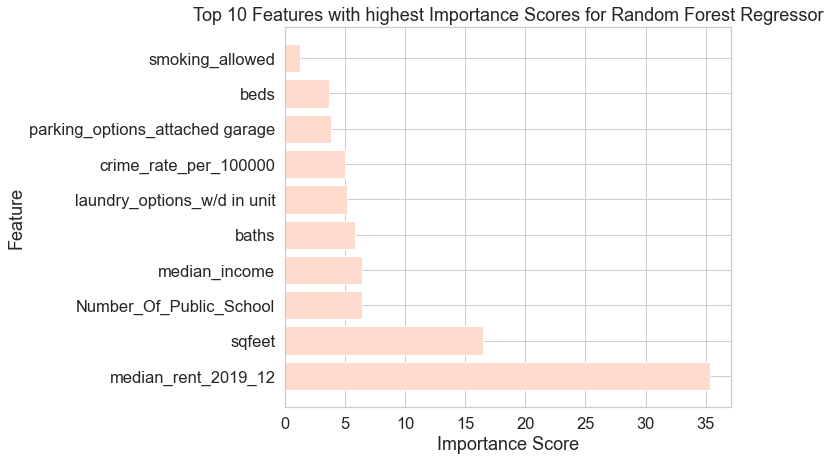

In [347]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Top 10 Features with highest Importance Scores for Random Forest Regressor')
plt.show()

In [330]:
feature_names

Index(['median_rent_2019_12', 'sqfeet', 'Number_Of_Public_School',
       'median_income', 'baths', 'laundry_options_w/d in unit',
       'crime_rate_per_100000', 'parking_options_attached garage', 'beds',
       'smoking_allowed', 'comes_furnished', 'dogs_allowed',
       'laundry_options_laundry on site', 'parking_options_off-street parking',
       'type_house', 'type_apartment', 'wheelchair_access',
       'laundry_options_w/d hookups', 'electric_vehicle_charge',
       'parking_options_detached garage', 'parking_options_carport',
       'laundry_options_laundry in bldg', 'type_condo',
       'parking_options_street parking', 'type_townhouse',
       'parking_options_no parking', 'type_manufactured', 'type_duplex',
       'parking_options_valet parking', 'laundry_options_no laundry on site',
       'type_loft', 'type_flat', 'type_cottage/cabin', 'type_in-law',
       'type_assisted living', 'type_land'],
      dtype='object')

In [309]:
rf_importance = pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

In [332]:
rf_importance.sort_values('Importance score',ascending=False, inplace=True)

AttributeError: 'NoneType' object has no attribute 'plot'

In [338]:
rf_importance

,Feature,Importance score
8,median_rent_2019_12,35.4
0,sqfeet,16.5
10,Number_Of_Public_School,6.4
11,median_income,6.4
2,baths,5.8
28,laundry_options_w/d in unit,5.1
9,crime_rate_per_100000,5.0
29,parking_options_attached garage,3.8
1,beds,3.7
4,smoking_allowed,1.3


In [ ]:
grid_values = {'ccp_alpha': np.linspace(1,5,20)}

rf2 = RandomForestRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88) 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=3,random_state=1,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=0)
rf_cv.fit(X_train, y_train)

In [230]:
## using GridSearchCV to find best max_features:

import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.9s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.0s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.7s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.0s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.5s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  42.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  46.4s
[CV] END max_features=2, min_samples_leaf=5, n_e

KeyboardInterrupt: 

In [231]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.3, 0.6])

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
print(rf_cv.best_params_)

In [ ]:
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

In [ ]:
pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)


In [ ]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

In [ ]:
comparison_data = {'Decision Tree Regression': ['{:.3f}'.format(OSR2(rf_cv, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, rf_cv.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))]}
comparison_data

In [ ]:
grid_values = {'max_features': ["sqrt", "log2"], 'min_samples_split': [10],
'n_estimators':  [200],
'random_state':  [88]} 
rf = RandomForestRegressor()
rf_cv  =  GridSearchCV(rf,  param_grid=grid_values,  cv=5,n_jobs=-1) 
rf_cv.fit(X_train, y_train)

In [ ]:
comparison_data = {'Random Forest Regression': ['{:.3f}'.format(OSR2(rf_cv, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, rf_cv.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))]}
comparison_data

In [ ]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

4)

In [255]:
gbr = GradientBoostingRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1      318249.4960           25.46s
         2      309892.3465           21.92s
         3      284424.9800           26.35s
         4      264455.3034           25.67s
         5      257600.3145           25.75s
         6      249816.5249           25.78s
         7      244799.4491           24.37s
         8      239331.7135           24.11s
         9      235418.1761           24.23s
        10      232262.2220           23.87s
        11      227529.8978           23.52s
        12      213064.6290           23.76s
        13      207567.8279           23.46s
        14      204071.6426           23.48s
        15      195626.1276           23.65s
        16      186788.9217           24.03s
        17      182483.3867           23.79s
        18      176332.5782           23.84s
        19      174033.6317           23.61s
        20      172653.9501           23.12s
        21      171128.8474           23.21s
        2

GradientBoostingRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                          random_state=88, verbose=2)

In [254]:
comparison_data = {'Boosting Regression': ['{:.3f}'.format(OSR2(gbr, X_test, y_test, y_train)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test, gbr.predict(X_test)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, gbr.predict(X_test)))]}
comparison_data

{'RF Regression': ['0.704', '313.4054', '186.340']}

In [354]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(123, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 123)               4551      
_________________________________________________________________
dense_25 (Dense)             (None, 2670)              331080    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 2671      
Total params: 338,302
Trainable params: 338,302
Non-trainable params: 0
_________________________________________________________________


In [355]:
import sklearn.metrics as metrics

In [356]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(X_train)
print('R2 on train---')
print(metrics.r2_score(y_train,predictions))

Epoch 1/100
997/997 [==============================] - 8s 7ms/step - loss: 2178569.5000 - mse: 2178569.5000 - mae: 354.5947 - val_loss: 229667.2656 - val_mse: 229667.2656 - val_mae: 263.5162
Epoch 2/100
997/997 [==============================] - 7s 7ms/step - loss: 537332.0000 - mse: 537332.0000 - mae: 271.1404 - val_loss: 344246.4375 - val_mse: 344246.4375 - val_mae: 259.9053
Epoch 3/100
997/997 [==============================] - 7s 7ms/step - loss: 640761.0000 - mse: 640761.0000 - mae: 282.6946 - val_loss: 307782.7500 - val_mse: 307782.7188 - val_mae: 293.9029
Epoch 4/100
997/997 [==============================] - 7s 7ms/step - loss: 573024.0000 - mse: 573024.0000 - mae: 292.7954 - val_loss: 302304.9375 - val_mse: 302304.9375 - val_mae: 252.8325
Epoch 5/100
997/997 [==============================] - 7s 7ms/step - loss: 558458.5000 - mse: 558458.5000 - mae: 281.6955 - val_loss: 3319483.5000 - val_mse: 3319483.2500 - val_mae: 538.5547
Epoch 6/100
997/997 [==============================

In [357]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [385]:
def OSR22(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [358]:
print(metrics.r2_score(y_train,predictions))

0.581007686457187


In [386]:
model_pred = model.predict(X_test)
print(OSR22(y_train, y_test, model_pred.flatten()))

0.5719576608494573


In [ ]:
model = Sequential()
model.add(Dense(123, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

In [267]:
from tensorflow.keras.layers import Input

In [273]:
nn_mod_2 = tensorflow.keras.Sequential()
nn_mod_2.add(Input(shape=(36,)))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(15, activation='sigmoid'))
nn_mod_2.add(Dense(1))

opt = RMSprop()
nn_mod_2.compile(optimizer=opt,
                 loss='mse',
               metrics=['mean_squared_error'])

tic = time.time()
nn_mod_2.fit(X_train,
           y_train,
           epochs=50,
           validation_split=0.2)
toc = time.time()
print('Neural Net 2 time:', round(toc-tic, 2),'s')

Epoch 1/50
4674/4674 [==============================] - 5s 987us/step - loss: 1587074.7500 - mean_squared_error: 1587074.7500 - val_loss: 1520060.5000 - val_mean_squared_error: 1520060.5000
Epoch 2/50
4674/4674 [==============================] - 4s 955us/step - loss: 1425526.3750 - mean_squared_error: 1425526.3750 - val_loss: 1363698.6250 - val_mean_squared_error: 1363698.6250
Epoch 3/50
4674/4674 [==============================] - 4s 926us/step - loss: 1275170.7500 - mean_squared_error: 1275170.7500 - val_loss: 1218539.5000 - val_mean_squared_error: 1218539.5000
Epoch 4/50
4674/4674 [==============================] - 5s 1ms/step - loss: 1136008.0000 - mean_squared_error: 1136008.0000 - val_loss: 1084529.6250 - val_mean_squared_error: 1084529.6250
Epoch 5/50
4674/4674 [==============================] - 5s 1ms/step - loss: 1008156.7500 - mean_squared_error: 1008156.7500 - val_loss: 961760.4375 - val_mean_squared_error: 961760.4375
Epoch 6/50
4674/4674 [==============================] - 

In [277]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [278]:
nn_pred_2 = nn_mod_2.predict(X_test)
print(OSR2(y_train, y_test, nn_pred_2.flatten()))

-3.620839420626076e-05


In [387]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(OSR2(lr3, X_test_lr, y_test_lr, y_train_lr)),
                                         '{:.4f}'.format(sqrt(mean_squared_error(y_test_lr, lr3.predict(X_test_lr)))),
                                         '{:.3f}'.format(mean_absolute_error(y_test_lr, lr3.predict(X_test_lr)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(OSR2(dtr_cv, X_test, y_test, y_train)),
                                               '{:.4f}'.format(sqrt(mean_squared_error(y_test, dtr_cv.predict(X_test)))),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(X_test)))],
                   'Random Forest Regressor': ['{:.3f}'.format(OSR2(rf_cv, X_test, y_test, y_train)),
                                     '{:.4f}'.format(sqrt(mean_squared_error(y_test, rf_cv.predict(X_test)))),
                                     '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))], 
                   'Gradient Boosted Regressor': ['{:.3f}'.format(OSR2(gbr, X_test, y_test, y_train)),
                                              '{:.4f}'.format(sqrt(mean_squared_error(y_test, gbr.predict(X_test)))),
                                              '{:.3f}'.format(mean_absolute_error(y_test, gbr.predict(X_test)))],
                  'Neural Networks':['{:.3f}'.format(OSR22(y_train, y_test, model_pred.flatten())),
                                              '{:.4f}'.format(sqrt(130541.3672)),
                                              '{:.3f}'.format(228.7942)]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample RMSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosted Regressor,Neural Networks
OSR2,0.512,0.754,0.830,0.704,0.572
Out-of-sample RMSE,402.3966,285.8934,237.3954,313.4054,361.3051
Out-of-sample MAE,255.757,129.494,105.052,186.340,228.794


In [388]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [389]:
def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [392]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 500)

(500, 3)


In [394]:
y_pred = rf_cv.predict(X_test)

Text(0.5, 1.0, 'Comparison of the bootstrapped OSR2 between random forest and decision tree Regressor')

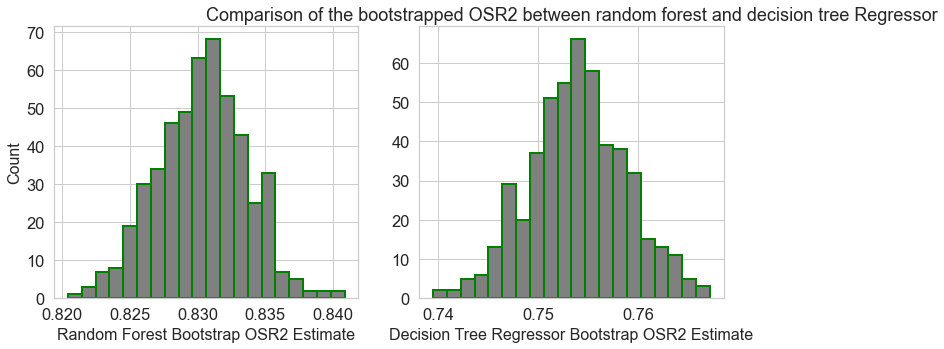

In [419]:
test_OSR2 = OS_R_squared(y_pred,y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Random Forest Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Decision Tree Regressor Bootstrap OSR2 Estimate', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[0].set_xlim([0.7,0.85])
axs[1].hist(bs_output_dtr.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[1].set_xlim([0.7,0.85])
plt.title('Comparison of the bootstrapped OSR2 between random forest and decision tree Regressor')

In [398]:
# The 95% confidence interval
CI=[0,1]
CI_0 = np.quantile(bs_output.iloc[:,0]-test_OSR2,np.array([0.025,0.975]))
CI[0] = test_OSR2 - CI_0[1]
CI[1] = test_OSR2 - CI_0[0]
print("The 95-percent confidence interval of OSR2 is %s" % CI) #0.5,0.64

The 95-percent confidence interval of OSR2 is [0.8242669151163888, 0.836637059410585]


In [408]:
bs_output_dtr = bootstrap_validation(X_test,y_test,y_train,dtr_cv,
                                 metrics_list=[OS_R_squared, mean_squared_error,mean_absolute_error],
                                 sample = 500)

(500, 3)


(array([ 2.,  2.,  5.,  6., 13., 29., 20., 37., 51., 55., 66., 58., 39.,
        38., 32., 15., 13., 11.,  5.,  3.]),
 array([0.73951323, 0.7408955 , 0.74227776, 0.74366003, 0.74504229,
        0.74642456, 0.74780683, 0.74918909, 0.75057136, 0.75195362,
        0.75333589, 0.75471816, 0.75610042, 0.75748269, 0.75886495,
        0.76024722, 0.76162949, 0.76301175, 0.76439402, 0.76577628,
        0.76715855]),
 <BarContainer object of 20 artists>)

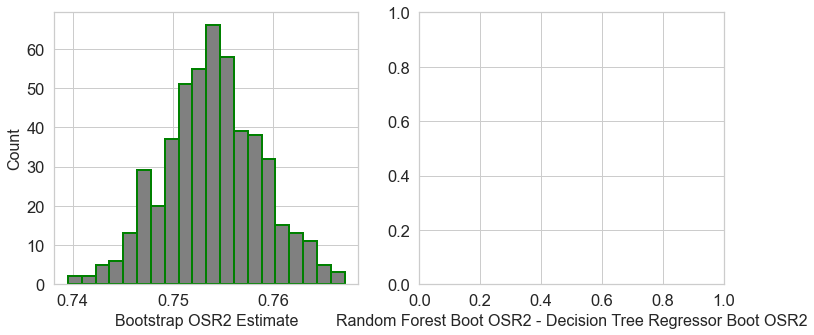

In [413]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Random Forest Boot OSR2 - Decision Tree Regressor Boot OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_dtr.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[0].set_xlim([0.4,0.7])
#axs[1].hist(bs_output.iloc[:,0]-bs_output_dtr.iloc[:0], bins=20,edgecolor='green', linewidth=2,color = "grey")
#axs[1].set_xlim([-0.15,0.15])